# MACHINE LEARNING LAB FAT
## NAME: SWATTIK MAITI
## REG NO: 18BCE0995

Design  a Neural Network for a Dataset from UCI (University of California, Irvine) Repository. Organise your implementation as a sequence of steps. Include Comments. Provide the link to the dataset. Give a short insight on data.
 Apply basic data preprocessing techniques. Establish the accuracy of the model. Showcase the best configuration and its accuracy.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [2]:
#Loading the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# The column headers are not very informative. Let us make them so.
# Column labels can be found under https://archive.ics.uci.edu/ml/datasets/Wine (Data set info section)

data.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [5]:
# Let's see the change
data

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Feature Engineering

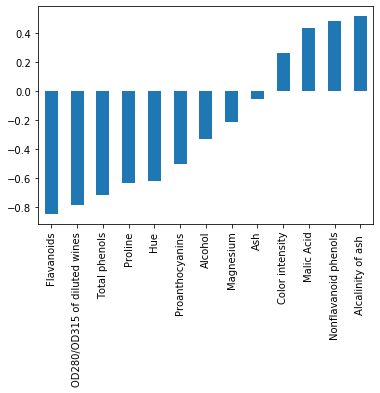

In [6]:
#bar plot of correlation with Result label makes it easy to understand dependencies
data.corr()["Label"][1:].sort_values().plot(kind='bar')

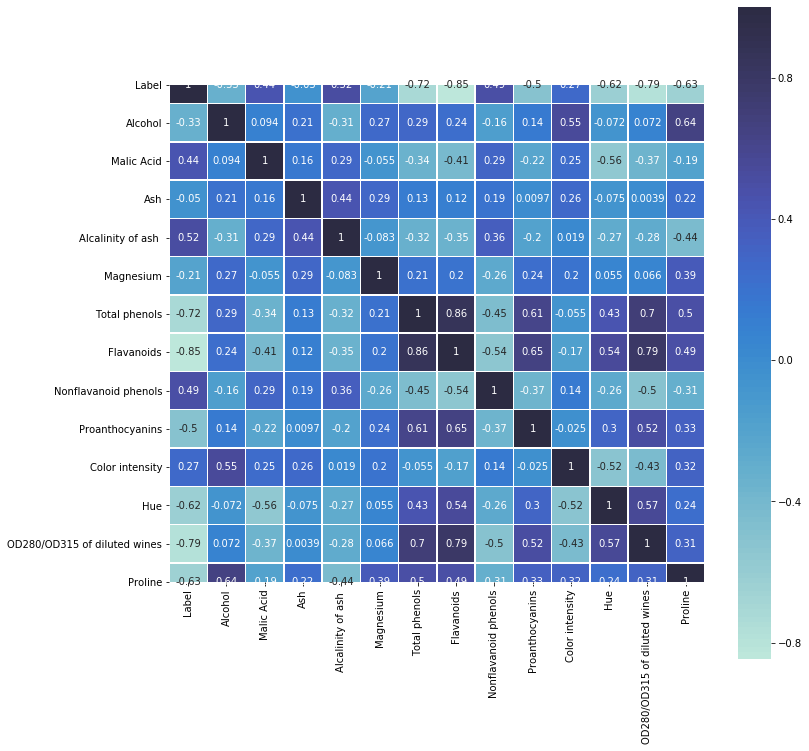

In [7]:
#plotting seaborn heatmap for the feature correlations 
corr = data[['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']].corr()
f,axes = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 1.4,ax = axes)

In [43]:
#using .map function to change -1 values to 0
data['Label'] = data['Label'].map({1:0, 2:1, 3:2})
data['Label'].unique()

array([0, 1, 2], dtype=int64)

In [44]:
#grouping data according to Result labels
from collections import Counter
classes=Counter(data['Label'].values)
class_dist=pd.DataFrame(classes.most_common(),columns=["Class","Num_of_Observations"])
class_dist

,Class,Num_of_Observations
0,1,71
1,0,59
2,2,48


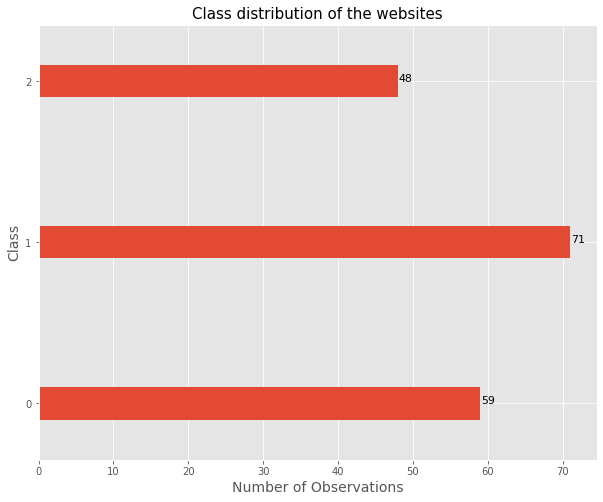

In [45]:
#plotting the class distribution of each class
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_of_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

In [46]:
#Using standard scalar to scale the features - Magnesium and proline 
from sklearn.preprocessing import StandardScaler

col_names = ['Magnesium','Proline']
features = data[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

data[col_names] = features
data.head()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,1.913905,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1.013009
1,0,13.20,1.78,2.14,11.2,0.018145,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.965242
2,0,13.16,2.36,2.67,18.6,0.088358,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1.395148
3,0,14.37,1.95,2.50,16.8,0.930918,3.85,3.49,0.24,2.18,7.80,0.86,3.45,2.334574
4,0,13.24,2.59,2.87,21.0,1.281985,2.80,2.69,0.39,1.82,4.32,1.04,2.93,-0.037874


In [47]:
data.shape

(178, 14)

## Splitting into training and tesing data

In [49]:
from sklearn.model_selection import train_test_split
X=data.drop(["Label"],axis=1).values
y=data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
y_train

array([0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1,
       1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

## Neural Network

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import *

In [52]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
142/142 [==============================] - 1s 5ms/step - loss: 1.2635 - acc: 0.4085
Epoch 2/50
142/142 [==============================] - 0s 70us/step - loss: 1.0691 - acc: 0.4507
Epoch 3/50
142/142 [==============================] - 0s 70us/step - loss: 1.0469 - acc: 0.6268
Epoch 4/50
142/142 [==============================] - 0s 56us/step - loss: 1.0142 - acc: 0.7183
Epoch 5/50
142/142 [==============================] - 0s 77us/step - loss: 0.9756 - acc: 0.5282
Epoch 6/50
142/142 [==============================] - 0s 70us/step - loss: 0.9237 - acc: 0.5141
Epoch 7/50
142/142 [==============================] - 0s 84us/step - loss: 0.8697 - acc: 0.7394
Epoch 8/50
142/142 [==============================] - 0s 77us/step - loss: 0.8182 - acc: 0.7254
Epoch 9/50
142/142 [==============================] - 0s 70us/step - loss: 0.7809 - acc: 0.8169
Epoch 10/50
142/142 [==============================] - 0s 63us/step - loss: 0.7465 - acc: 0.8028
Epoch 11/50
142/142 [===================

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_48 (Dense)             (None, 3)                 27        
Total params: 3,849
Trainable params: 3,849
Non-trainable params: 0
_________________________________________________________________


In [55]:

pr=model.predict_classes(X_test)
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.86      0.92      0.89        13
           2       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



In [56]:
confusion_matrix(y_test,pr)

array([[12,  2,  0],
       [ 0, 12,  1],
       [ 0,  0,  9]], dtype=int64)

In [57]:
pr

array([0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0], dtype=int64)

### Training a more dense network

In [58]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [59]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
142/142 [==============================] - 1s 7ms/step - loss: 1.1376 - acc: 0.2887
Epoch 2/50
142/142 [==============================] - 0s 162us/step - loss: 1.0773 - acc: 0.4085
Epoch 3/50
142/142 [==============================] - 0s 155us/step - loss: 1.0524 - acc: 0.4225
Epoch 4/50
142/142 [==============================] - 0s 148us/step - loss: 0.9116 - acc: 0.6338
Epoch 5/50
142/142 [==============================] - 0s 130us/step - loss: 0.8478 - acc: 0.6268
Epoch 6/50
142/142 [==============================] - 0s 155us/step - loss: 0.8253 - acc: 0.5915
Epoch 7/50
142/142 [==============================] - 0s 126us/step - loss: 0.7701 - acc: 0.6408
Epoch 8/50
142/142 [==============================] - 0s 126us/step - loss: 0.6858 - acc: 0.6408
Epoch 9/50
142/142 [==============================] - 0s 126us/step - loss: 0.6498 - acc: 0.6761
Epoch 10/50
142/142 [==============================] - 0s 133us/step - loss: 0.6002 - acc: 0.6690
Epoch 11/50
142/142 [==========

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_50 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 136       
__________

In [61]:
pr=model.predict_classes(X_test)
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.85      0.85      0.85        13
           2       0.90      1.00      0.95         9

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36



In [62]:
confusion_matrix(y_test,pr)

array([[12,  2,  0],
       [ 1, 11,  1],
       [ 0,  0,  9]], dtype=int64)

### Adding Dropout Layer to check whether it improves accuracy.

In [63]:
dr_model = Sequential()


# input layer
dr_model.add(Dense(13,  activation='relu'))
dr_model.add(Dropout(0.4))

# hidden layer
dr_model.add(Dense(64, activation='relu'))
dr_model.add(Dropout(0.4))

dr_model.add(Dense(32,  activation='relu'))
dr_model.add(Dropout(0.4))

dr_model.add(Dense(16,  activation='relu'))
dr_model.add(Dropout(0.4))

# hidden layer
dr_model.add(Dense(8, activation='relu'))
dr_model.add(Dropout(0.4))

# output layer
dr_model.add(Dense(units=3,activation='softmax'))

# Compile model
dr_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [64]:
dr_model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=128,
          validation_data=(X_test, y_test)
          )


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 142 samples, validate on 36 samples
Epoch 1/500
142/142 [==============================] - 1s 9ms/step - loss: 3.3379 - acc: 0.3310 - val_loss: 1.0349 - val_acc: 0.4444
Epoch 2/500
142/142 [==============================] - 0s 84us/step - loss: 3.1114 - acc: 0.3873 - val_loss: 1.0246 - val_acc: 0.6111
Epoch 3/500
142/142 [==============================] - 0s 91us/step - loss: 2.8797 - acc: 0.3169 - val_loss: 1.0412 - val_acc: 0.3889
Epoch 4/500
142/142 [==============================] - 0s 91us/step - loss: 3.1495 - acc: 0.2958 - val_loss: 1.0642 - val_acc: 0.3889
Epoch 5/500
142/142 [==============================] - 0s 84us/step - loss: 2.7582 - acc: 0.2958 - val_loss: 1.0810 - val_acc: 0.3889
Epoch 6/500
142/142 [==============================] - 0s 91us/step - loss: 3.1209 - acc: 0.2324 - val_loss: 1.0878 - val_acc: 0.3889
Epoch 7/500
142/142 [===============

Epoch 57/500
142/142 [==============================] - 0s 70us/step - loss: 1.1703 - acc: 0.3662 - val_loss: 1.1015 - val_acc: 0.1389
Epoch 58/500
142/142 [==============================] - 0s 85us/step - loss: 1.2503 - acc: 0.3521 - val_loss: 1.1012 - val_acc: 0.1389
Epoch 59/500
142/142 [==============================] - 0s 84us/step - loss: 1.3187 - acc: 0.3451 - val_loss: 1.1008 - val_acc: 0.1667
Epoch 60/500
142/142 [==============================] - 0s 77us/step - loss: 1.3088 - acc: 0.3662 - val_loss: 1.1005 - val_acc: 0.1944
Epoch 61/500
142/142 [==============================] - 0s 81us/step - loss: 1.1188 - acc: 0.3873 - val_loss: 1.1002 - val_acc: 0.1944
Epoch 62/500
142/142 [==============================] - 0s 84us/step - loss: 1.2295 - acc: 0.3732 - val_loss: 1.0998 - val_acc: 0.1944
Epoch 63/500
142/142 [==============================] - 0s 70us/step - loss: 1.2149 - acc: 0.3592 - val_loss: 1.0993 - val_acc: 0.1944
Epoch 64/500
142/142 [==============================] -

142/142 [==============================] - 0s 88us/step - loss: 1.0688 - acc: 0.4085 - val_loss: 1.0874 - val_acc: 0.3611
Epoch 118/500
142/142 [==============================] - 0s 77us/step - loss: 1.1118 - acc: 0.4437 - val_loss: 1.0870 - val_acc: 0.3611
Epoch 119/500
142/142 [==============================] - 0s 77us/step - loss: 1.1172 - acc: 0.3944 - val_loss: 1.0867 - val_acc: 0.3611
Epoch 120/500
142/142 [==============================] - 0s 77us/step - loss: 1.1506 - acc: 0.4014 - val_loss: 1.0864 - val_acc: 0.3611
Epoch 121/500
142/142 [==============================] - 0s 74us/step - loss: 1.1167 - acc: 0.3169 - val_loss: 1.0861 - val_acc: 0.3611
Epoch 122/500
142/142 [==============================] - 0s 77us/step - loss: 1.1386 - acc: 0.3803 - val_loss: 1.0856 - val_acc: 0.3611
Epoch 123/500
142/142 [==============================] - 0s 70us/step - loss: 1.0897 - acc: 0.4155 - val_loss: 1.0849 - val_acc: 0.3611
Epoch 124/500
142/142 [==============================] - 0s 77

142/142 [==============================] - 0s 77us/step - loss: 1.0560 - acc: 0.4014 - val_loss: 1.0832 - val_acc: 0.3611
Epoch 178/500
142/142 [==============================] - 0s 98us/step - loss: 1.0669 - acc: 0.4296 - val_loss: 1.0831 - val_acc: 0.3611
Epoch 179/500
142/142 [==============================] - 0s 84us/step - loss: 1.0692 - acc: 0.4577 - val_loss: 1.0830 - val_acc: 0.3611
Epoch 180/500
142/142 [==============================] - 0s 84us/step - loss: 1.0762 - acc: 0.4296 - val_loss: 1.0830 - val_acc: 0.3611
Epoch 181/500
142/142 [==============================] - 0s 85us/step - loss: 1.0935 - acc: 0.3521 - val_loss: 1.0830 - val_acc: 0.3611
Epoch 182/500
142/142 [==============================] - 0s 91us/step - loss: 1.0818 - acc: 0.3873 - val_loss: 1.0829 - val_acc: 0.3611
Epoch 183/500
142/142 [==============================] - 0s 84us/step - loss: 1.0675 - acc: 0.4155 - val_loss: 1.0829 - val_acc: 0.3611
Epoch 184/500
142/142 [==============================] - 0s 92

142/142 [==============================] - 0s 77us/step - loss: 1.1044 - acc: 0.3873 - val_loss: 1.0824 - val_acc: 0.3611
Epoch 238/500
142/142 [==============================] - 0s 99us/step - loss: 1.0763 - acc: 0.3732 - val_loss: 1.0822 - val_acc: 0.3611
Epoch 239/500
142/142 [==============================] - 0s 84us/step - loss: 1.0689 - acc: 0.4296 - val_loss: 1.0820 - val_acc: 0.3611
Epoch 240/500
142/142 [==============================] - 0s 77us/step - loss: 1.1109 - acc: 0.3944 - val_loss: 1.0818 - val_acc: 0.3611
Epoch 241/500
142/142 [==============================] - 0s 92us/step - loss: 1.0562 - acc: 0.4225 - val_loss: 1.0818 - val_acc: 0.3611
Epoch 242/500
142/142 [==============================] - 0s 77us/step - loss: 1.1067 - acc: 0.3521 - val_loss: 1.0818 - val_acc: 0.3611
Epoch 243/500
142/142 [==============================] - 0s 84us/step - loss: 1.0791 - acc: 0.4437 - val_loss: 1.0816 - val_acc: 0.3611
Epoch 244/500
142/142 [==============================] - 0s 84

142/142 [==============================] - 0s 84us/step - loss: 1.0803 - acc: 0.4085 - val_loss: 1.0753 - val_acc: 0.3611
Epoch 298/500
142/142 [==============================] - 0s 84us/step - loss: 1.0556 - acc: 0.4085 - val_loss: 1.0751 - val_acc: 0.3611
Epoch 299/500
142/142 [==============================] - 0s 92us/step - loss: 1.0400 - acc: 0.4296 - val_loss: 1.0750 - val_acc: 0.3611
Epoch 300/500
142/142 [==============================] - 0s 92us/step - loss: 1.0532 - acc: 0.4225 - val_loss: 1.0748 - val_acc: 0.3611
Epoch 301/500
142/142 [==============================] - 0s 99us/step - loss: 1.0610 - acc: 0.3873 - val_loss: 1.0747 - val_acc: 0.3611
Epoch 302/500
142/142 [==============================] - 0s 92us/step - loss: 1.0626 - acc: 0.4155 - val_loss: 1.0747 - val_acc: 0.3611
Epoch 303/500
142/142 [==============================] - 0s 92us/step - loss: 1.0490 - acc: 0.4155 - val_loss: 1.0746 - val_acc: 0.3611
Epoch 304/500
142/142 [==============================] - 0s 84

142/142 [==============================] - 0s 91us/step - loss: 1.0114 - acc: 0.4718 - val_loss: 1.0457 - val_acc: 0.3611
Epoch 358/500
142/142 [==============================] - 0s 99us/step - loss: 1.0347 - acc: 0.4225 - val_loss: 1.0437 - val_acc: 0.3611
Epoch 359/500
142/142 [==============================] - 0s 91us/step - loss: 1.0389 - acc: 0.4648 - val_loss: 1.0417 - val_acc: 0.3611
Epoch 360/500
142/142 [==============================] - 0s 85us/step - loss: 1.0455 - acc: 0.4085 - val_loss: 1.0395 - val_acc: 0.3611
Epoch 361/500
142/142 [==============================] - 0s 84us/step - loss: 1.0654 - acc: 0.4085 - val_loss: 1.0378 - val_acc: 0.3611
Epoch 362/500
142/142 [==============================] - 0s 84us/step - loss: 1.0318 - acc: 0.3944 - val_loss: 1.0363 - val_acc: 0.3611
Epoch 363/500
142/142 [==============================] - 0s 85us/step - loss: 1.0395 - acc: 0.4296 - val_loss: 1.0349 - val_acc: 0.3611
Epoch 364/500
142/142 [==============================] - 0s 77

142/142 [==============================] - 0s 84us/step - loss: 0.9428 - acc: 0.5000 - val_loss: 0.9551 - val_acc: 0.3611
Epoch 418/500
142/142 [==============================] - 0s 84us/step - loss: 0.9821 - acc: 0.4225 - val_loss: 0.9524 - val_acc: 0.3889
Epoch 419/500
142/142 [==============================] - 0s 84us/step - loss: 1.0042 - acc: 0.4437 - val_loss: 0.9524 - val_acc: 0.4167
Epoch 420/500
142/142 [==============================] - 0s 85us/step - loss: 0.9959 - acc: 0.4577 - val_loss: 0.9537 - val_acc: 0.4167
Epoch 421/500
142/142 [==============================] - 0s 84us/step - loss: 0.9490 - acc: 0.4930 - val_loss: 0.9550 - val_acc: 0.4167
Epoch 422/500
142/142 [==============================] - 0s 77us/step - loss: 0.9424 - acc: 0.5000 - val_loss: 0.9565 - val_acc: 0.4167
Epoch 423/500
142/142 [==============================] - 0s 78us/step - loss: 0.9430 - acc: 0.4930 - val_loss: 0.9573 - val_acc: 0.4167
Epoch 424/500
142/142 [==============================] - 0s 77

142/142 [==============================] - 0s 77us/step - loss: 0.8903 - acc: 0.5141 - val_loss: 0.7568 - val_acc: 0.4722
Epoch 478/500
142/142 [==============================] - 0s 70us/step - loss: 0.9146 - acc: 0.5352 - val_loss: 0.7498 - val_acc: 0.4722
Epoch 479/500
142/142 [==============================] - 0s 92us/step - loss: 0.8894 - acc: 0.4718 - val_loss: 0.7466 - val_acc: 0.4722
Epoch 480/500
142/142 [==============================] - 0s 84us/step - loss: 0.9564 - acc: 0.4648 - val_loss: 0.7492 - val_acc: 0.4722
Epoch 481/500
142/142 [==============================] - 0s 91us/step - loss: 0.8361 - acc: 0.5423 - val_loss: 0.7543 - val_acc: 0.4722
Epoch 482/500
142/142 [==============================] - 0s 92us/step - loss: 0.8664 - acc: 0.5141 - val_loss: 0.7577 - val_acc: 0.4722
Epoch 483/500
142/142 [==============================] - 0s 102us/step - loss: 0.8703 - acc: 0.5141 - val_loss: 0.7613 - val_acc: 0.4722
Epoch 484/500
142/142 [==============================] - 0s 9

In [66]:
losses = pd.DataFrame(dr_model.history.history)

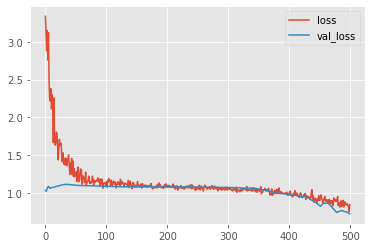

In [67]:
losses[['loss','val_loss']].plot()

In [68]:
predictions = dr_model.predict_classes(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.92      0.89        13
           2       0.88      0.78      0.82         9

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.92        36



In [70]:
confusion_matrix(y_test,predictions)

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  2,  7]], dtype=int64)

#### The best accuracy of 92% is achieved in the final configuration